In [1]:


# Installing Beautiful Soup
import sys
!conda install --yes --prefix {sys.prefix} beautifulsoup4

Solving environment: ...working... done

# All requested packages already installed.





==> WARNING: A newer version of conda exists. <==
  current version: 4.4.9
  latest version: 4.4.11

Please update conda by running

    $ conda update -n base conda




In [2]:
# Imports for assignment

%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import bs4
from bs4 import BeautifulSoup

In [24]:
import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
movies_metadata = pd.read_csv("ProjectData/movies_metadata.csv")

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
movies_metadata

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
5,False,NaN,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",NaN,949,tt0113277,en,Heat,"Obsessive master thief, Neil McCauley leads a ...",...,1995-12-15,187436818.0,170.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,A Los Angeles Crime Saga,Heat,False,7.7,1886.0
6,False,NaN,58000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,11860,tt0114319,en,Sabrina,An ugly duckling having undergone a remarkable...,...,1995-12-15,0.0,127.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,You are cordially invited to the most surprisi...,Sabrina,False,6.2,141.0
7,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,45325,tt0112302,en,Tom and Huck,"A mischievous young boy, Tom Sawyer, witnesses...",...,1995-12-22,0.0,97.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,The Original Bad Boys.,Tom and Huck,False,5.4,45.0
8,False,NaN,35000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,9091,tt0114576,en,Sudden Death,International action superstar Jean Claude Van...,...,1995-12-22,64350171.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Terror goes into overtime.,Sudden Death,False,5.5,174.0
9,False,"{'id': 645, 'name': 'James Bond Collection', '...",58000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://www.mgm.com/view/movie/757/Goldeneye/,710,tt0113189,en,GoldenEye,James Bond must unmask the mysterious head of ...,...,1995-11-16,352194034.0,130.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,No limits. No fears. No substitutes.,GoldenEye,False,6.6,1194.0


In [5]:
movies_metadata.drop('spoken_languages', axis=1, inplace=True)
movies_metadata.drop('homepage', axis=1, inplace=True)
movies_metadata.drop('original_title', axis=1, inplace=True)
movies_metadata.drop('status', axis=1, inplace=True)


In [6]:
movies_metadata

,adult,belongs_to_collection,budget,genres,id,imdb_id,original_language,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,tt0114709,en,"Led by Woody, Andy's toys live happily in his ...",21.9469,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,tt0113497,en,When siblings Judy and Peter discover an encha...,17.0155,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,tt0113228,en,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,tt0114885,en,"Cheated on, mistreated and stepped on, the wom...",3.85949,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",11862,tt0113041,en,Just when George Banks has recovered from his ...,8.38752,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
5,False,NaN,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",949,tt0113277,en,"Obsessive master thief, Neil McCauley leads a ...",17.9249,/zMyfPUelumio3tiDKPffaUpsQTD.jpg,"[{'name': 'Regency Enterprises', 'id': 508}, {...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,187436818.0,170.0,A Los Angeles Crime Saga,Heat,False,7.7,1886.0
6,False,NaN,58000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",11860,tt0114319,en,An ugly duckling having undergone a remarkable...,6.67728,/jQh15y5YB7bWz1NtffNZmRw0s9D.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'DE', 'name': 'Germany'}, {'is...",1995-12-15,0.0,127.0,You are cordially invited to the most surprisi...,Sabrina,False,6.2,141.0
7,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",45325,tt0112302,en,"A mischievous young boy, Tom Sawyer, witnesses...",2.56116,/sGO5Qa55p7wTu7FJcX4H4xIVKvS.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,97.0,The Original Bad Boys.,Tom and Huck,False,5.4,45.0
8,False,NaN,35000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",9091,tt0114576,en,International action superstar Jean Claude Van...,5.23158,/eoWvKD60lT95Ss1MYNgVExpo5iU.jpg,"[{'name': 'Universal Pictures', 'id': 33}, {'n...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,64350171.0,106.0,Terror goes into overtime.,Sudden Death,False,5.5,174.0
9,False,"{'id': 645, 'name': 'James Bond Collection', '...",58000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",710,tt0113189,en,James Bond must unmask the mysterious head of ...,14.686,/5c0ovjT41KnYIHYuF4AWsTe3sKh.jpg,"[{'name': 'United Artists', 'id': 60}, {'name'...","[{'is

In [7]:
# List of Oscars Winners

best_picture = "https://en.wikipedia.org/wiki/Academy_Award_for_Best_Picture"
best_director = "https://en.wikipedia.org/wiki/Academy_Award_for_Best_Director"
best_actor = "https://en.wikipedia.org/wiki/Academy_Award_for_Best_Actor"
best_supporting_actor = "https://en.wikipedia.org/wiki/Academy_Award_for_Best_Supporting_Actor"
best_actress = "https://en.wikipedia.org/wiki/Academy_Award_for_Best_Actress"
best_supporting_actress = "https://en.wikipedia.org/wiki/Academy_Award_for_Best_Supporting_Actress"
best_animated_feature = "https://en.wikipedia.org/wiki/Academy_Award_for_Best_Animated_Feature"
best_animated_short = "https://en.wikipedia.org/wiki/Academy_Award_for_Best_Animated_Short_Film"
best_cin = "https://en.wikipedia.org/wiki/Academy_Award_for_Best_Cinematography"
best_costume = "https://en.wikipedia.org/wiki/Academy_Award_for_Best_Costume_Design"
best_doc_feature = "https://en.wikipedia.org/wiki/Academy_Award_for_Best_Documentary_Feature"
best_doc_short = "https://en.wikipedia.org/wiki/Academy_Award_for_Best_Documentary_(Short_Subject)"
best_film_editing = "https://en.wikipedia.org/wiki/Academy_Award_for_Best_Film_Editing"
best_foreign_film = "https://en.wikipedia.org/wiki/Academy_Award_for_Best_Foreign_Language_Film"
best_live_short = "https://en.wikipedia.org/wiki/Academy_Award_for_Best_Live_Action_Short_Film"
best_makeup = "https://en.wikipedia.org/wiki/Academy_Award_for_Best_Makeup_and_Hairstyling"
best_score = "https://en.wikipedia.org/wiki/Academy_Award_for_Best_Original_Score"
best_song = "https://en.wikipedia.org/wiki/Academy_Award_for_Best_Original_Song"
best_production = "https://en.wikipedia.org/wiki/Academy_Award_for_Best_Production_Design"
best_sound = "https://en.wikipedia.org/wiki/Academy_Award_for_Best_Sound_Editing"
best_mixing = "https://en.wikipedia.org/wiki/Academy_Award_for_Best_Sound_Mixing"
best_effects = "https://en.wikipedia.org/wiki/Academy_Award_for_Best_Visual_Effects"
best_screenplay = "https://en.wikipedia.org/wiki/Academy_Award_for_Best_Adapted_Screenplay"
best_original_screenplay = "https://en.wikipedia.org/wiki/Academy_Award_for_Best_Original_Screenplay"

In [9]:
page = requests.get(best_picture)
soup = BeautifulSoup(page.content, "html.parser")

tables = soup.find("table", {"class":"wikitable"})#Lets take a look at movie studios and their avg ratings
avg_rating = movies_metadata['vote_average'].mean()

In [10]:
#Lets take a look at movie studios and their avg ratings
avg_rating = movies_metadata['vote_average'].mean()
avg_rating

5.618207215133889

In [11]:
lang_list = movies_metadata['original_language'].value_counts()
lang = lang_list[lang_list >= 100]
lang

en    32269
fr     2438
it     1529
ja     1350
de     1080
es      994
ru      826
hi      508
ko      444
zh      409
sv      384
pt      316
cn      313
fi      297
nl      248
da      225
pl      219
tr      150
cs      130
el      113
no      106
fa      101
hu      100
Name: original_language, dtype: int64

In [12]:
#movies_metadata.dtypes
movies_metadata['original_language'].unique()

array(['en', 'fr', 'zh', 'it', 'fa', 'nl', 'de', 'cn', 'ar', 'es', 'ru',
       'sv', 'ja', 'ko', 'sr', 'bn', 'he', 'pt', 'wo', 'ro', 'hu', 'cy',
       'vi', 'cs', 'da', 'no', 'nb', 'pl', 'el', 'sh', 'xx', 'mk', 'bo',
       'ca', 'fi', 'th', 'sk', 'bs', 'hi', 'tr', 'is', 'ps', 'ab', 'eo',
       'ka', 'mn', 'bm', 'zu', 'uk', 'af', 'la', 'et', 'ku', 'fy', 'lv',
       'ta', 'sl', 'tl', 'ur', 'rw', 'id', 'bg', 'mr', 'lt', 'kk', 'ms',
       'sq', nan, '104.0', 'qu', 'te', 'am', 'jv', 'tg', 'ml', 'hr', 'lo',
       'ay', 'kn', 'eu', 'ne', 'pa', 'ky', 'gl', '68.0', 'uz', 'sm', 'mt',
       '82.0', 'hy', 'iu', 'lb', 'si'], dtype=object)

In [13]:
#function to get ratings by language
def language_selector(language):
    ret = movies_metadata.loc[movies_metadata['original_language'] == language]
    return ret['vote_average']

In [14]:
en_rating = language_selector("en").mean()
en_rating

5.491170545758738

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D91737F470>]], dtype=object)

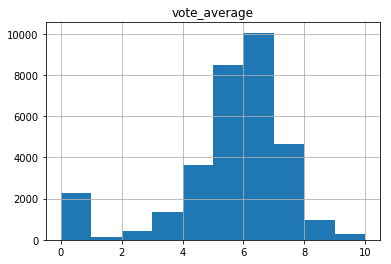

In [15]:
#average english movie rating graph
movies_metadata[movies_metadata['original_language'] == 'en'].hist(column = 'vote_average' )

In [16]:
fr_rating = language_selector("fr").mean()
fr_rating

6.056480721903172

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D918365E80>]], dtype=object)

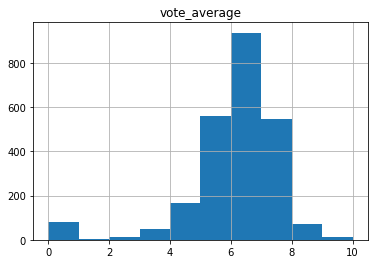

In [17]:
movies_metadata[movies_metadata['original_language'] == 'fr'].hist(column = 'vote_average' )

In [18]:
it_rating = language_selector("it").mean()
it_rating

5.458796599084376

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D916E272B0>]], dtype=object)

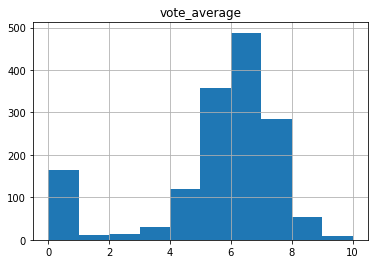

In [19]:
movies_metadata[movies_metadata['original_language'] == 'it'].hist(column = 'vote_average' )

In [20]:
ja_rating = language_selector("ja").mean()
ja_rating

6.274203113417358

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D917AF6B00>]], dtype=object)

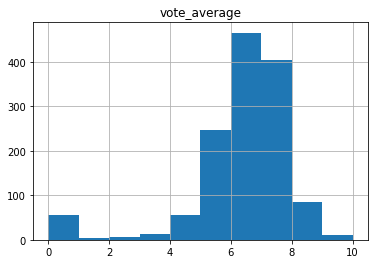

In [21]:
movies_metadata[movies_metadata['original_language'] == 'ja'].hist(column = 'vote_average' )

In [22]:
zh_rating = language_selector("zh").mean()
zh_rating

6.366992665036675

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D91967C780>]], dtype=object)

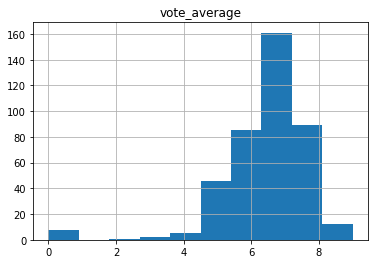

In [23]:
movies_metadata[movies_metadata['original_language'] == 'zh'].hist(column = 'vote_average' )

In [32]:
#Patsy begins
df2 = movies_metadata.loc[((movies_metadata['original_language'] == "en"))]
df2

,adult,belongs_to_collection,budget,genres,id,imdb_id,original_language,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,tt0114709,en,"Led by Woody, Andy's toys live happily in his ...",21.9469,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,tt0113497,en,When siblings Judy and Peter discover an encha...,17.0155,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,tt0113228,en,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,tt0114885,en,"Cheated on, mistreated and stepped on, the wom...",3.85949,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",11862,tt0113041,en,Just when George Banks has recovered from his ...,8.38752,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
5,False,NaN,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",949,tt0113277,en,"Obsessive master thief, Neil McCauley leads a ...",17.9249,/zMyfPUelumio3tiDKPffaUpsQTD.jpg,"[{'name': 'Regency Enterprises', 'id': 508}, {...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,187436818.0,170.0,A Los Angeles Crime Saga,Heat,False,7.7,1886.0
6,False,NaN,58000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",11860,tt0114319,en,An ugly duckling having undergone a remarkable...,6.67728,/jQh15y5YB7bWz1NtffNZmRw0s9D.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'DE', 'name': 'Germany'}, {'is...",1995-12-15,0.0,127.0,You are cordially invited to the most surprisi...,Sabrina,False,6.2,141.0
7,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",45325,tt0112302,en,"A mischievous young boy, Tom Sawyer, witnesses...",2.56116,/sGO5Qa55p7wTu7FJcX4H4xIVKvS.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,97.0,The Original Bad Boys.,Tom and Huck,False,5.4,45.0
8,False,NaN,35000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",9091,tt0114576,en,International action superstar Jean Claude Van...,5.23158,/eoWvKD60lT95Ss1MYNgVExpo5iU.jpg,"[{'name': 'Universal Pictures', 'id': 33}, {'n...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,64350171.0,106.0,Terror goes into overtime.,Sudden Death,False,5.5,174.0
9,False,"{'id': 645, 'name': 'James Bond Collection', '...",58000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",710,tt0113189,en,James Bond must unmask the mysterious head of ...,14.686,/5c0ovjT41KnYIHYuF4AWsTe3sKh.jpg,"[{'name': 'United Artists', 'id': 60}, {'name'...","[{'is

In [33]:
outcome_1, predictors_1 = patsy.dmatrices('original_language ~ vote_average', df2)
mod_1 = sm.OLS(outcome_1, predictors_1)
res_1 = mod_1.fit()

In [34]:
print(res_1.summary())

                              OLS Regression Results                             
Dep. Variable:     original_language[en]   R-squared:                        -inf
Model:                               OLS   Adj. R-squared:                   -inf
Method:                    Least Squares   F-statistic:                -3.226e+04
Date:                   Wed, 28 Feb 2018   Prob (F-statistic):               1.00
Time:                           16:23:58   Log-Likelihood:             1.0467e+06
No. Observations:                  32267   AIC:                        -2.093e+06
Df Residuals:                      32265   BIC:                        -2.093e+06
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1386: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
